### Random Forest

In [1]:
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv('hospital.csv')

In [4]:
df=data.dropna()

In [5]:
df

,outcome,age,BMI,heart rate,Systolic blood pressure,Diastolic blood pressure,Respiratory rate,temperature,SP O2,Urine output,glucose,PH
0,0.0,72,37.588179,68.837838,155.866667,68.333333,16.621622,36.714286,98.394737,2155.0,114.636364,7.230
2,0.0,83,26.572634,72.318182,135.333333,61.375000,23.640000,36.453704,95.291667,2425.0,149.000000,7.268
3,0.0,43,83.264629,94.500000,126.400000,73.200000,21.857143,36.287037,93.846154,8760.0,128.250000,7.370
4,0.0,75,31.824842,67.920000,156.560000,58.120000,21.360000,36.761905,99.280000,4455.0,145.750000,7.250
5,0.0,76,24.262293,74.181818,118.100000,52.950000,20.545455,35.266667,96.818182,1840.0,98.333333,7.310
...,...,...,...,...,...,...,...,...,...,...,...,...
1155,0.0,83,21.551321,66.320000,111.160000,50.440000,18.440000,35.796296,95.000000,1845.0,262.000000,7.310
1156,0.0,78,19.580651,70.863636,131.904762,50.142857,15.652174,36.194445,97.045455,1715.0,93.000000,7.460
1158,0.0,82,28.950609,79.791667,104.064516,44.483871,21.166667,36.555556,96.761905,1812.0,160.250000,7.430
1164,1.0,76,26.197235,90.000000,103.440000,58.560000,18.428571,36.293650,98.964286,1825.0,89.000000,7.240


In [6]:
df.columns

Index(['outcome', 'age', 'BMI', 'heart rate', 'Systolic blood pressure',
       'Diastolic blood pressure', 'Respiratory rate', 'temperature', 'SP O2',
       'Urine output', 'glucose', 'PH'],
      dtype='object')

In [7]:
df=df.rename({'heart rate':'heart_rate','Systolic blood pressure':'Systolic_blood_pressure',
              'Diastolic blood pressure':'Diastolic_blood_pressure','Respiratory rate':'Respiratory_rate',
              'SP O2':'SP_O2','Urine output':'Urine_output'},axis=1)

In [8]:
df.head()

,outcome,age,BMI,heart_rate,Systolic_blood_pressure,Diastolic_blood_pressure,Respiratory_rate,temperature,SP_O2,Urine_output,glucose,PH
0,0.0,72,37.588179,68.837838,155.866667,68.333333,16.621622,36.714286,98.394737,2155.0,114.636364,7.230
2,0.0,83,26.572634,72.318182,135.333333,61.375000,23.640000,36.453704,95.291667,2425.0,149.000000,7.268
3,0.0,43,83.264629,94.500000,126.400000,73.200000,21.857143,36.287037,93.846154,8760.0,128.250000,7.370
4,0.0,75,31.824842,67.920000,156.560000,58.120000,21.360000,36.761905,99.280000,4455.0,145.750000,7.250
5,0.0,76,24.262293,74.181818,118.100000,52.950000,20.545455,35.266667,96.818182,1840.0,98.333333,7.310


In [9]:
# Preprocessing, split test and dataset, split response variable
X=df.drop(labels='outcome',axis=1)
# Response variable
y=df.loc[:,'outcome']

In [10]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

ros=RandomOverSampler(random_state=42)
x_ros,y_ros=ros.fit_resample(X,y)
print('OUR DATASET COUNT        :',Counter(y))
print('OVER SAMPLING DATA COUNT :',Counter(y_ros))

OUR DATASET COUNT        : Counter({0.0: 608, 1.0: 101})
OVER SAMPLING DATA COUNT : Counter({0.0: 608, 1.0: 608})


In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x_ros,y_ros,test_size=0.8,random_state=42,stratify=y_ros)

In [12]:
# Fitting GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,plot_confusion_matrix

In [13]:
# Training
RF=RandomForestClassifier()
RF.fit(X_train,y_train)
predicted=RF.predict(X_test)

In [14]:
# Finding Accuracy
accuracy=accuracy_score(y_test,predicted)
print('Accuracy of RandomForestClassifier',accuracy*100)

Accuracy of RandomForestClassifier 82.52826310380267


In [15]:
# Finding Classification Report
cr=classification_report(y_test,predicted)
print('Classification report\n\n',cr)

Classification report

               precision    recall  f1-score   support

         0.0       0.84      0.80      0.82       487
         1.0       0.81      0.85      0.83       486

    accuracy                           0.83       973
   macro avg       0.83      0.83      0.83       973
weighted avg       0.83      0.83      0.83       973



In [16]:
# Finding Confusion Matrix
cm=confusion_matrix(y_test,predicted)
print('Confusion matrix \n\n',cm)

Confusion matrix 

 [[389  98]
 [ 72 414]]


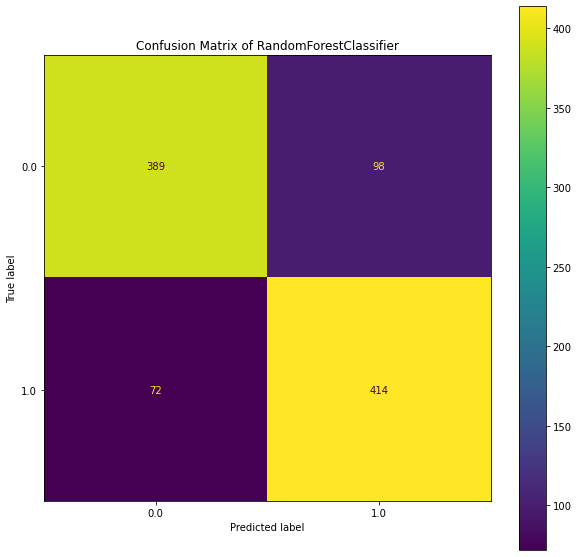

In [17]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(figsize=(10,10))
plot_confusion_matrix(RF,X_test,y_test,ax=ax)
plt.title('Confusion Matrix of RandomForestClassifier')
plt.show()

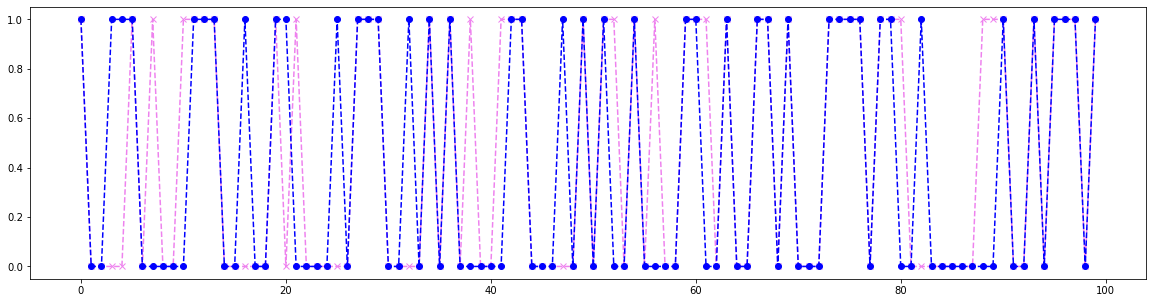

In [18]:
df2=pd.DataFrame()
df2['y_test']=y_test
df2['predicted']=predicted
df2.reset_index(inplace=True)
plt.figure(figsize=(20,5))
plt.plot(df2['predicted'][:100],marker='x',linestyle='dashed',color='violet')
plt.plot(df2['y_test'][:100],marker='o',linestyle='dashed',color='blue')
plt.show()